In [28]:
from Functions_13ind import *
import numpy as np 
import matplotlib.pyplot as plt 
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
length = 75
t = np.arange(1,length + 1)
numbers = ['01','02','03','04','05','06','07','08','09','10','11','12','13']
path = os.getcwd()
path_data = path + '/GIMME analyses/Cleaned GIMME Data/Control_Group/10'
path_beta = path_data + '/Control_Group_output/individual/10'

<div class="alert alert-block alert-info"><h1>
Scale 1, diagonal noise
</div></h1>

Generate noise using `np.random.randn` method

In [15]:
cov_type = 'diagonal'
alpha = 1

for rep in range(1,11):  
    for num in numbers:
        A, B = get_betas(num) 
        M = get_matrix_vector(num, (length,4), alpha)
        
        np.savetxt(path+'/13_ind/Diagonal_vector/Scale_'+str(alpha)+'_noise'+'/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt',  
                   M, delimiter=',', header='VR,SS,ANX,INT', comments='')   

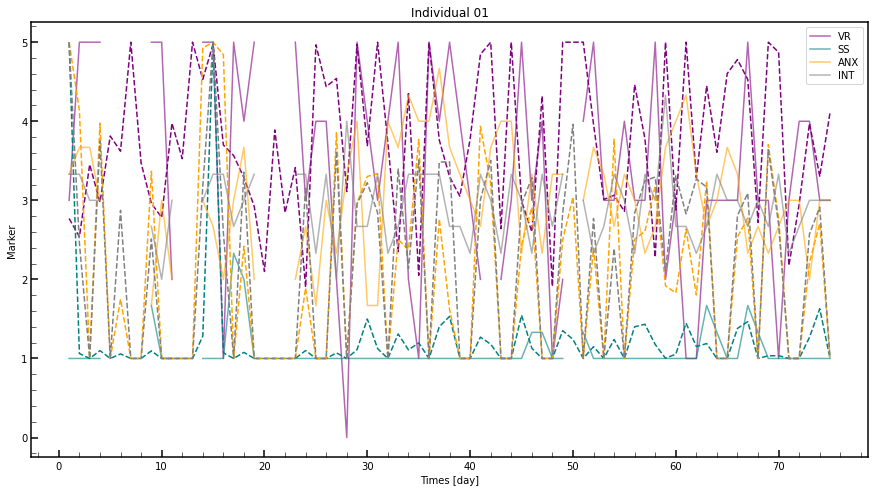

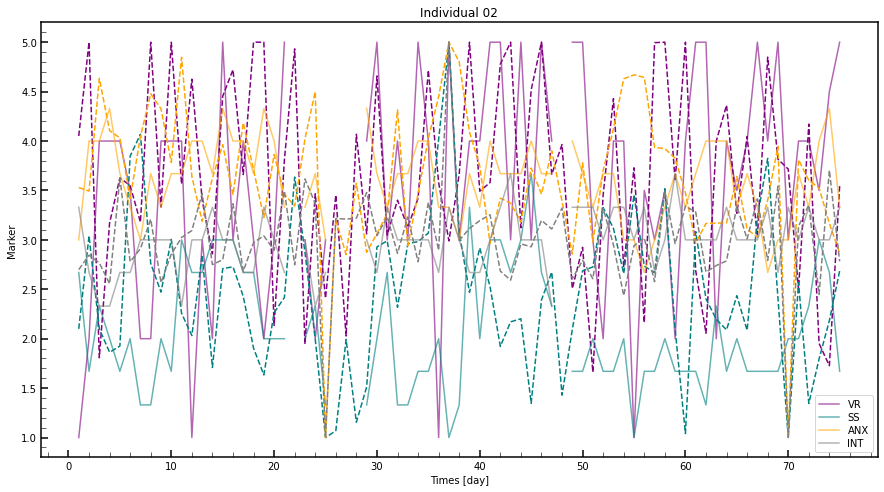

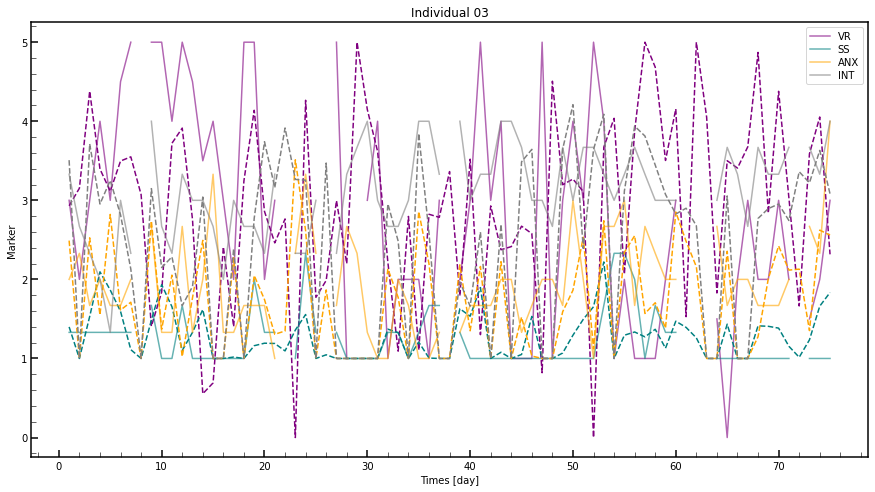

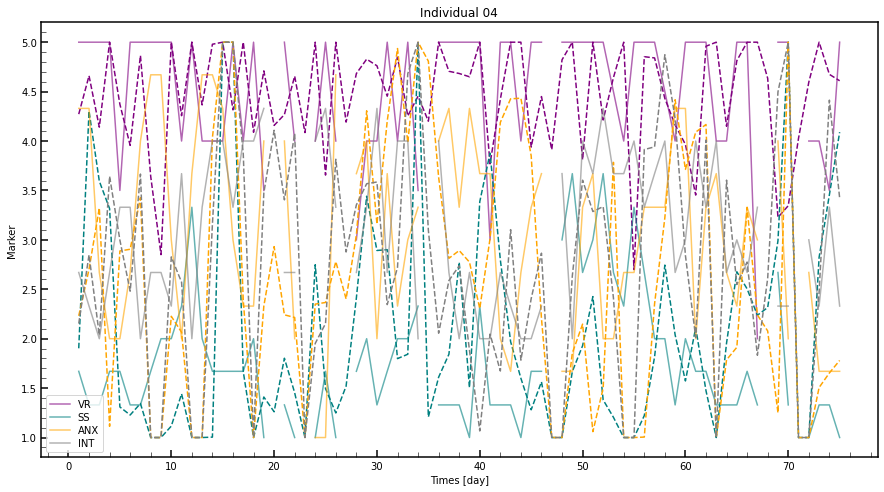

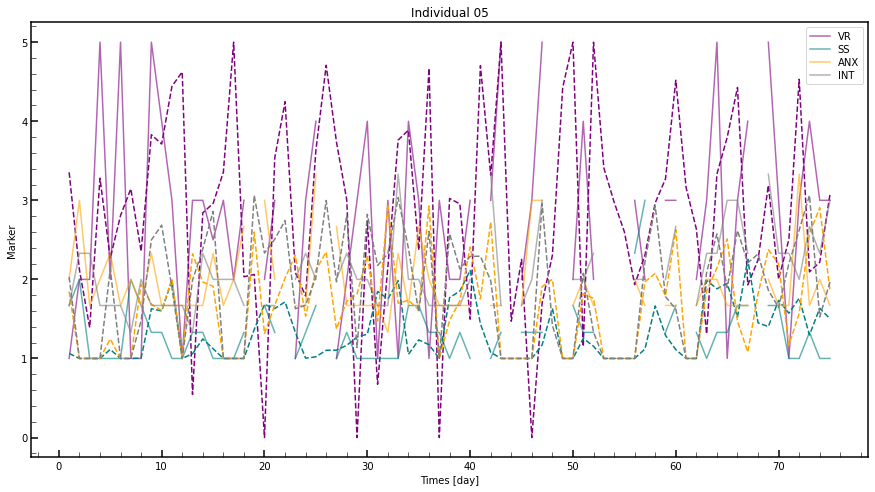

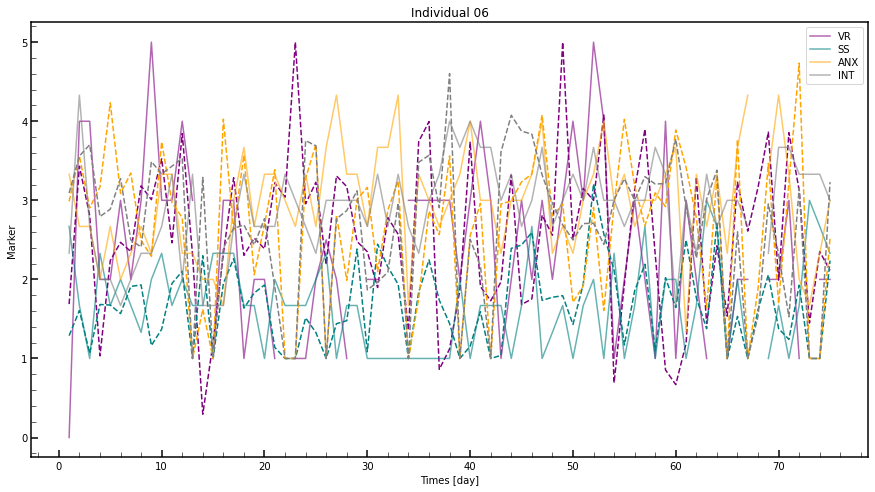

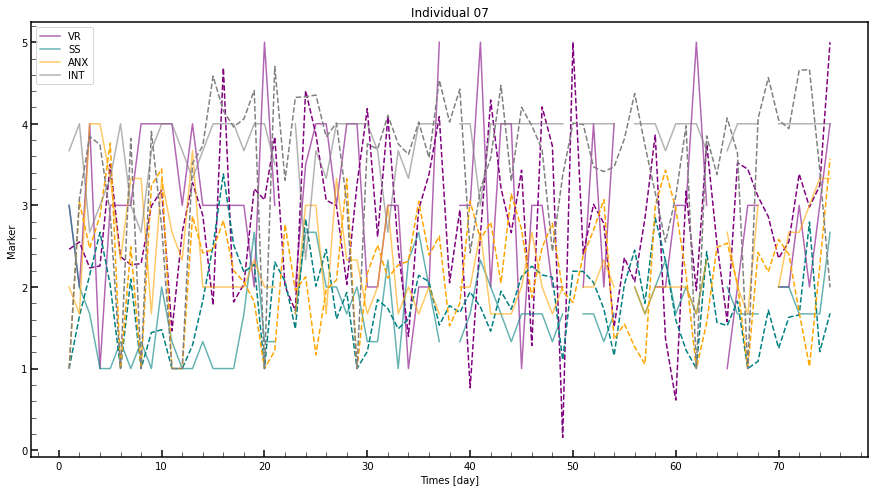

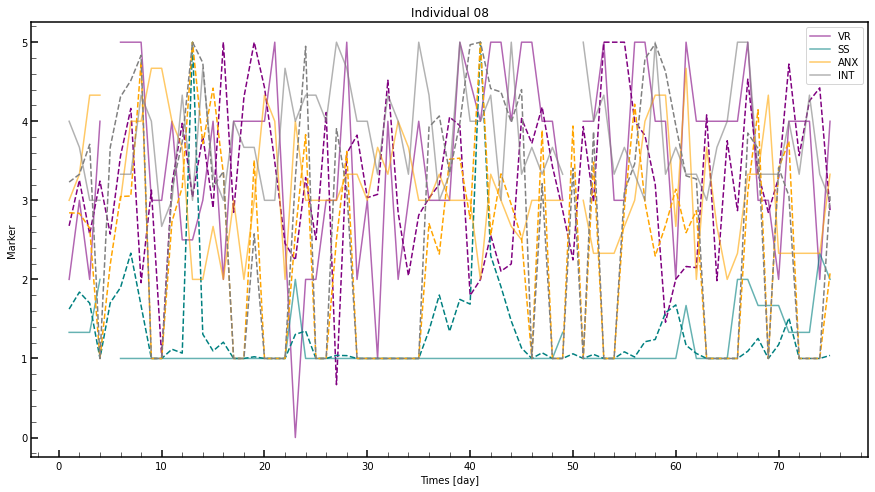

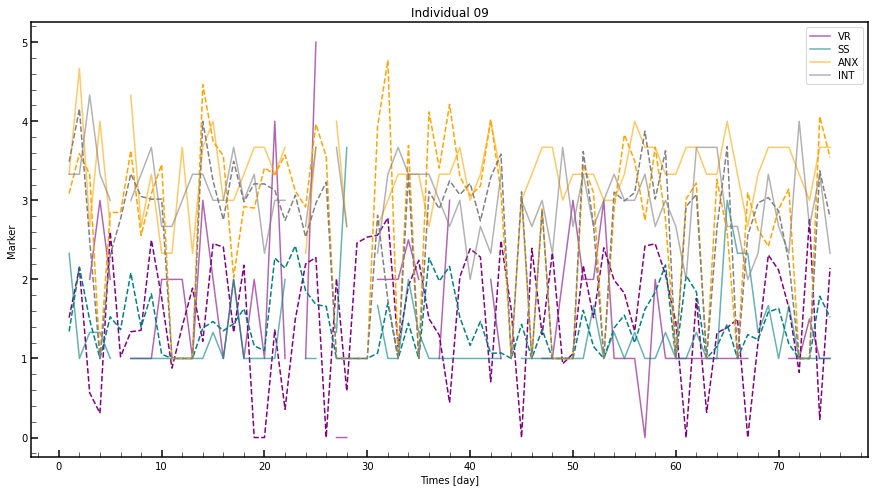

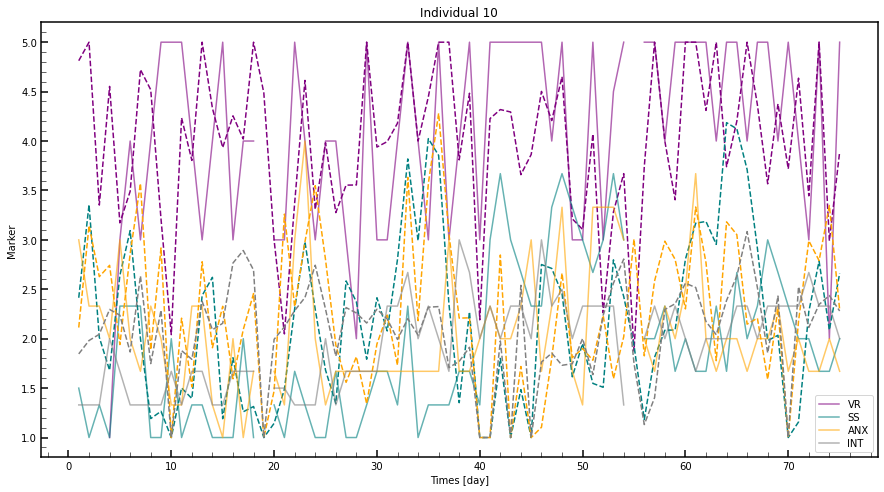

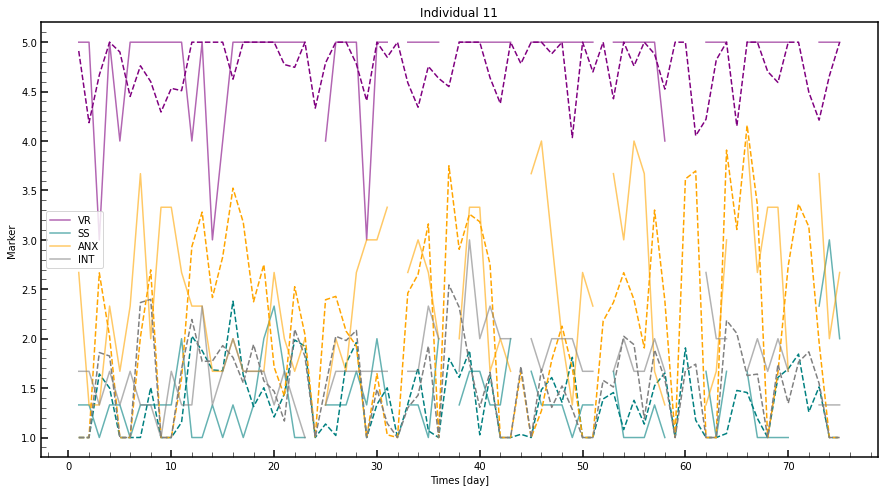

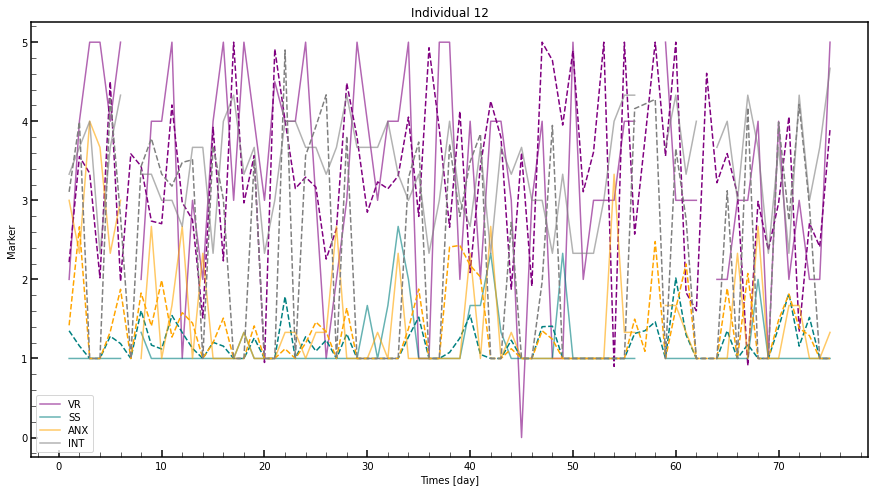

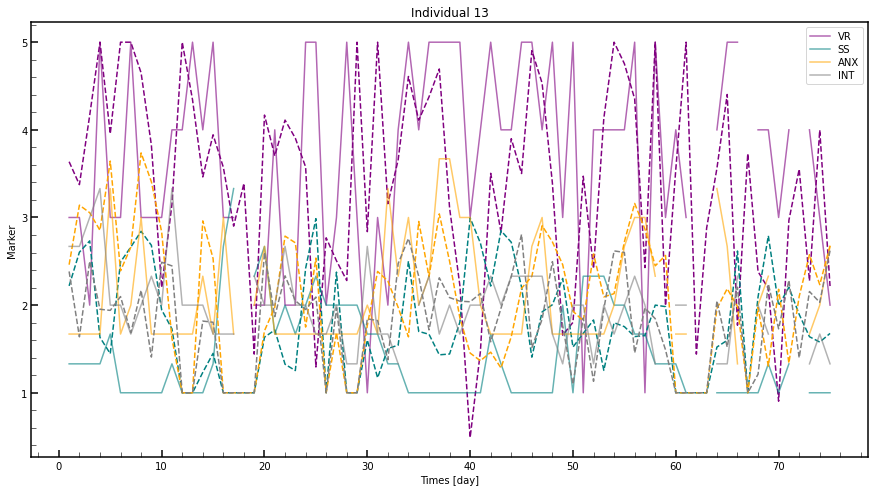

In [27]:
# Plots
# Emperical data in solid lines, simulated data in dashed lines

rep = 1


for num in numbers:
    plt.figure(figsize=(15, 8))
    
    VR, SS, ANX, INT = np.genfromtxt(path_data+num+'.txt', skip_header=1, unpack=True)
    vr, ss, anx, intt = np.loadtxt(path+'/13_ind/Diagonal_vector/Scale_'+str(alpha)+'_noise/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt', skiprows=1, delimiter=',', unpack=True)
    
    plt.plot(t, VR, label='VR', alpha=0.6, linestyle='-', color='purple')
    plt.plot(t, vr, linestyle='--', color='purple')
    
    plt.plot(t, SS, label='SS', alpha=0.6, linestyle='-', color='teal')
    plt.plot(t, ss, linestyle='--', color='teal')
    
    plt.plot(t, ANX, label='ANX', alpha=0.6, linestyle='-', color='orange')
    plt.plot(t, anx, linestyle='--', color='orange')
    
    plt.plot(t, INT, label='INT', alpha=0.6, linestyle='-', color='gray')
    plt.plot(t, intt, linestyle='--', color='gray')
        
    plt.legend()
    plt.xlabel('Times [day]')
    plt.ylabel('Marker')
    plt.title('Individual ' + num)

<div class="alert alert-block alert-info"><h1>
Scale n, diagonal noise and switching VR <--> SS
</div></h1>

The code below generates 10 sets of simulated data with each set containing simulated data of VR, SS, ANX, INT for 13 individuals. If <code>change_matrix_coeff = True</code> then the SS and VR coefficients are exchanged in individual 1's coefficient matrix only and data is generated with scale 1 simple noise. If <code>change_matrix_coeff = False</code> then all coefficient matrices remain unchanged however data is generated with scaled noise (e.g scale 2, 10 or 100). Noise is generated using the method where `np.random.randn` is multiplied by the standard devations.   

In [31]:
alpha = 2
change_matrix_coeff = True

for rep in range(1,11): 
    for num in numbers:
        A, B = get_betas(num) 
        M = get_matrix_vector(num, (length,4), A, B, alpha)
        
        if change_matrix_coeff:
            if num == '01':
                alpha = 1
                A_changed = np.copy(A)
                A_changed[1, 0] = A_changed[0, 1]  # Switch SS --> VR to VR --> SS
                A_changed[0, 1] = 0
            
                M = get_matrix_vector(num, (length,4), A_changed, B, alpha)

                np.savetxt(path+'/13_ind/Change_matrix_coeff/Scale_'+str(alpha)+'_noise'+'/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt', 
                           M, delimiter=',', header='VR,SS,ANX,INT', comments='')
                
            M = get_matrix_vector(num, (75,4), A, B, alpha)
            np.savetxt(path+'/13_ind/Change_matrix_coeff/Scale_'+str(alpha)+'_noise'+'/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt', 
                       M, delimiter=',', header='VR,SS,ANX,INT', comments='')
        else:
            M = get_matrix_vector(num, (75,4), A, B, alpha)
            np.savetxt(path+'13_ind/Diagonal_vector/Scale_'+str(alpha)+'_noise/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt', 
                       M, delimiter=',', header='VR,SS,ANX,INT', comments='')